# Import libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
%matplotlib inline

# For drive access
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


# Load train data csv file

In [2]:
df = pd.read_csv('/content/drive/MyDrive/207/207-Project/notebooks/RG/3_species/train_val.csv')

df.head()

,primary_label,filename,type,filename_npy,rating,duration_secs_32000,country,continent,data
0,eaywag1,eaywag1/XC718442.ogg,blank,eaywag1/XC718442.npy,good,12.538781,FR,EUROPE,train
1,eaywag1,eaywag1/XC675682.ogg,call,eaywag1/XC675682.npy,good,35.657000,RU,EUROPE,train
2,eaywag1,eaywag1/XC722533.ogg,blank,eaywag1/XC722533.npy,good,58.104000,RU,EUROPE,train
3,eaywag1,eaywag1/XC673617.ogg,call,eaywag1/XC673617.npy,poor,18.756000,GB,EUROPE,train
4,eaywag1,eaywag1/XC675935.ogg,call,eaywag1/XC675935.npy,good,16.666000,RU,EUROPE,train


In [4]:
example = np.load('/content/drive/MyDrive/207/207-Project/data/train/librosa_loaded/' + df['filename_npy'].iloc[0])
example

array([ 8.50955257e-06,  1.51871936e-05,  2.57813517e-05, ...,
       -1.34145375e-06, -7.96734821e-06, -1.04890205e-05], dtype=float32)

# define function to visualize

In [41]:
def visualize_audio(audio, sr=16000):
  '''
  usage:
    plot soundwave, mel-frequency spectogram, and RMS engergy for the audio
  input:
    audio   - audio file
    sr      - audio rate
  output:
    plot soundwave, mel-frequency spectogram, and RMS engergy
  '''
  fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10), sharex=True)

  # plot1: soundwave
  librosa.display.waveshow(audio, ax=axes[0][0])
  axes[0][0].set_title('Soundwave')
  axes[0][0].set_ylabel('Amplitude')
  axes[0][0].set_xlabel('')

  # plot2: log scale melspectogram
  power_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
  S_dB = librosa.power_to_db(power_spectrogram, ref=np.max)
  librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', fmax=8000, ax=axes[1][0])
  axes[1][0].set_title('Log Scale Melspectrogram')
  axes[1][0].set_xlabel('')

  # plot3: mfcc
  mfcc = librosa.feature.mfcc(y=audio, sr=sr)
  librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', fmax=8000, ax=axes[2][0])
  axes[2][0].set_title('MFCC')
  axes[2][0].set_xlabel('')

  # plot4: chroma
  chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
  librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=axes[0][1])
  axes[0][1].set_title('Chroma')
  axes[0][1].set_xlabel('')

  # plot5: RMS energy
  rms = librosa.feature.rms(y=audio)
  times = librosa.times_like(rms)
  axes[1][1].plot(times, rms[0])
  axes[1][1].set_title('RMS Energy')
  axes[1][1].set_ylabel('RMS')

  # plot6: Spectral Centroid
  sc = librosa.feature.spectral_centroid(y=audio, sr=sr)
  axes[2][1].plot(times, sc.T)
  axes[2][1].set_title('Spectral Centroid')
  axes[2][1].set_ylabel('Hz')

  plt.tight_layout()

  axes[2][1].set_xlabel('Time')
  axes[2][0].set_xlabel('Time')

  plt.xlim(0,9)

  plt.show()

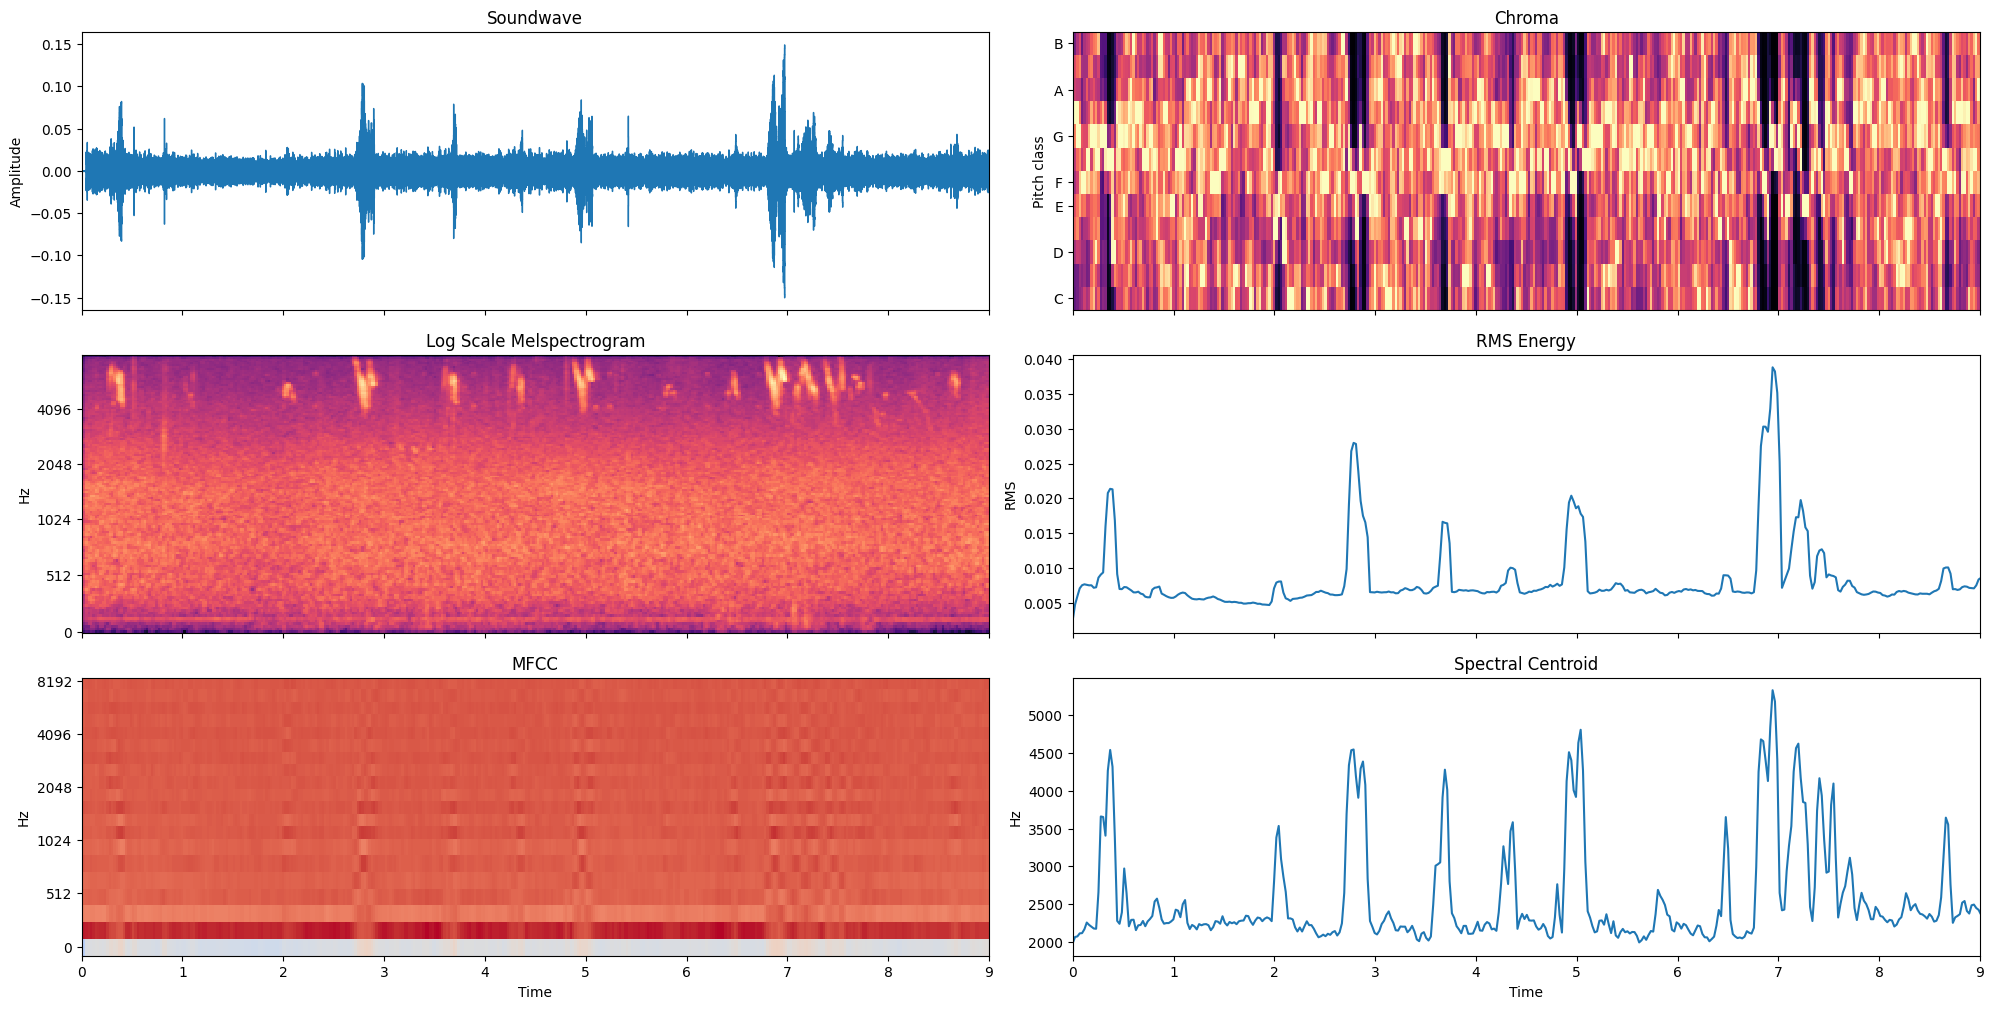

In [42]:
visualize_audio(example)